##Kaggle: House-prices-advanced-regression-techniques##
**Download Dataset**
---
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

###Step
1 Load Data

2 Merge data and process the data

3 Check the missing value and fill the null value 

4 Clean and Split the data 

5 Feature Engineering

6 KNN_Regression

7 Linear Regression

8 Random Forest


**Import Libraries and Load Dataset**

---

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#Install GPyOpt
!pip install GPyOpt

In [4]:
# Load dataset
warnings.filterwarnings('ignore')
pd.reset_option('^display.', silent=True)

X_train = pd.read_csv('../content/drive/My Drive/CSTU/house-prices-advanced-regression-techniques/train.csv', encoding='Latin-1')
X_test = pd.read_csv('../content/drive/My Drive/CSTU/house-prices-advanced-regression-techniques/test.csv', encoding='Latin-1')

num_train = len(X_train)
print("Total trainning samples:",len(X_train),"\n")

y_train = X_train.SalePrice

#Merge train and test to simplify pre-processing
df=pd.concat([X_train,X_test],ignore_index = True)

X_train.head()

Total trainning samples: 1460 



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**Exploratory Analysis data**

---


In Data Analysis We will Analyze To Find out the below stuff

1.Missing Values

2.All The Numerical Variables

3.Distribution of the Numerical Variables

4.Categorical Variables

5.Cardinality of Categorical Variables
Outliers

6.Relationship between independent and 

7.dependent feature(SalePrice)

In [5]:
# Show descriptive statistics of training set
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [6]:
# Dataset preview
#We can check the first 5 rows of data
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,...,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,...,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,...,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,...,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,...,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [7]:
# Number of rows and columns
print(df.shape)

(2919, 81)


In [8]:
# Show how many values are non-null for each feature
#We can check data type, some of them are integer, some of them object, 
#this will help us clearly understand the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5e2f4e4208>,
      dtype=object)

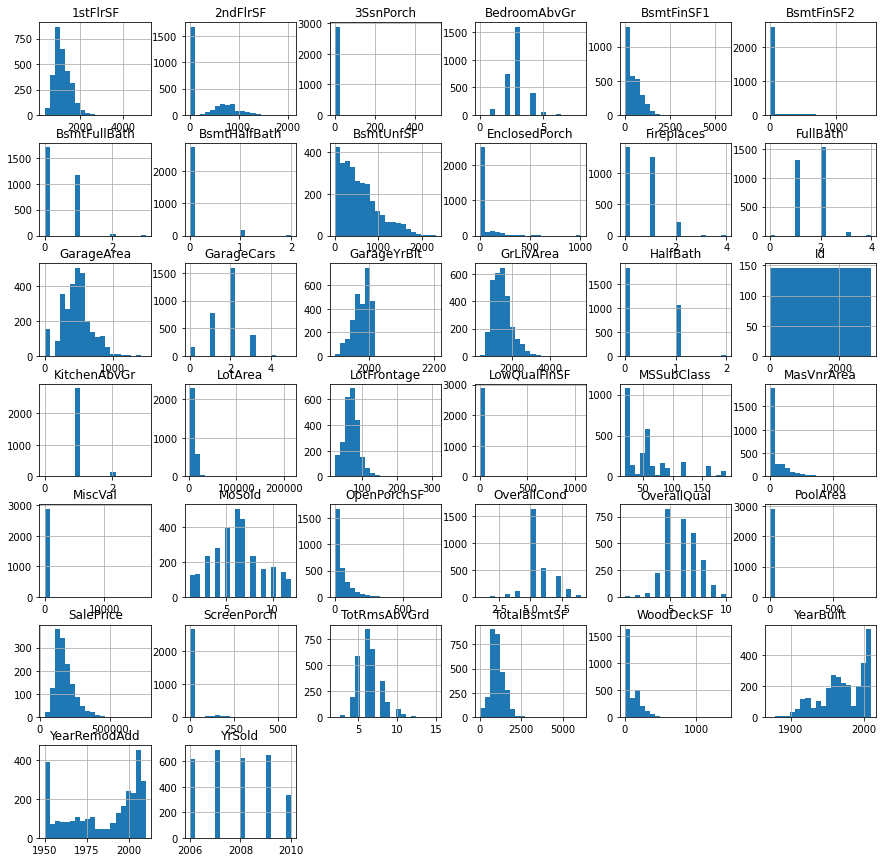

In [9]:
# Visualization for data statistic distribution
# We will find out which feature we can use 
df.hist(figsize = (15,15),bins=20)

Missing Value

---

In [10]:
# Check null data
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 81, dtype: int64

In [11]:
## Let us capture all the nan values
## First lets handle Categorical features which are missing
features_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes=='O']

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(df[feature].isnull().mean(),4)))

MSZoning: 0.0014% missing values
Alley: 0.9322% missing values
Utilities: 0.0007% missing values
MasVnrType: 0.0082% missing values
BsmtQual: 0.0277% missing values
BsmtCond: 0.0281% missing values
BsmtExposure: 0.0281% missing values
BsmtFinType1: 0.0271% missing values
BsmtFinType2: 0.0274% missing values
Functional: 0.0007% missing values
FireplaceQu: 0.4865% missing values
GarageType: 0.0538% missing values
GarageFinish: 0.0545% missing values
GarageQual: 0.0545% missing values
GarageCond: 0.0545% missing values
PoolQC: 0.9966% missing values
Fence: 0.8044% missing values
MiscFeature: 0.964% missing values


In [12]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008,208500.0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,5,2007,181500.0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,9,2008,223500.0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,2,2006,140000.0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0,12,2008,250000.0


In [13]:
## Replace missing value with a new label
def replace_cat_feature(dataset,features_nan):
    data=df.copy()
    data[features_nan]=data[features_nan].fillna('Missing')
    return data

df=replace_cat_feature(df,features_nan)

df[features_nan].isnull().sum()

MSZoning        0
Alley           0
Utilities       0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Functional      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [14]:
## Let us capture all the nan values
## First lets handle Categorical features which are missing
features_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1]

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(df[feature].isnull().mean(),4)))

LotFrontage: 0.1665% missing values
MasVnrArea: 0.0079% missing values
BsmtFullBath: 0.0007% missing values
BsmtHalfBath: 0.0007% missing values
GarageYrBlt: 0.0545% missing values
SalePrice: 0.4998% missing values


In [15]:
df.fillna(df.mean(), inplace=True)

Since they are many missing values, we need to fill all the missing value and find the relationship between missing values and Sales Price
Let's plot some diagram for this relationship

Clean data and splite data 

---

In [16]:
# Show the column types we are dealing with
df.dtypes.value_counts()
cat_columns = df.select_dtypes('object').columns
num_columns = [i for i in list(df.columns) if i not in list(df.select_dtypes('object').columns)]
print(len(df.columns)-len(df.select_dtypes('object').columns),'numerical columns:')
print(num_columns, '\n')
print(len(df.select_dtypes('object').columns),'categorical columns:')
print(list(cat_columns))

38 numerical columns:
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'] 

43 categorical columns:
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'F

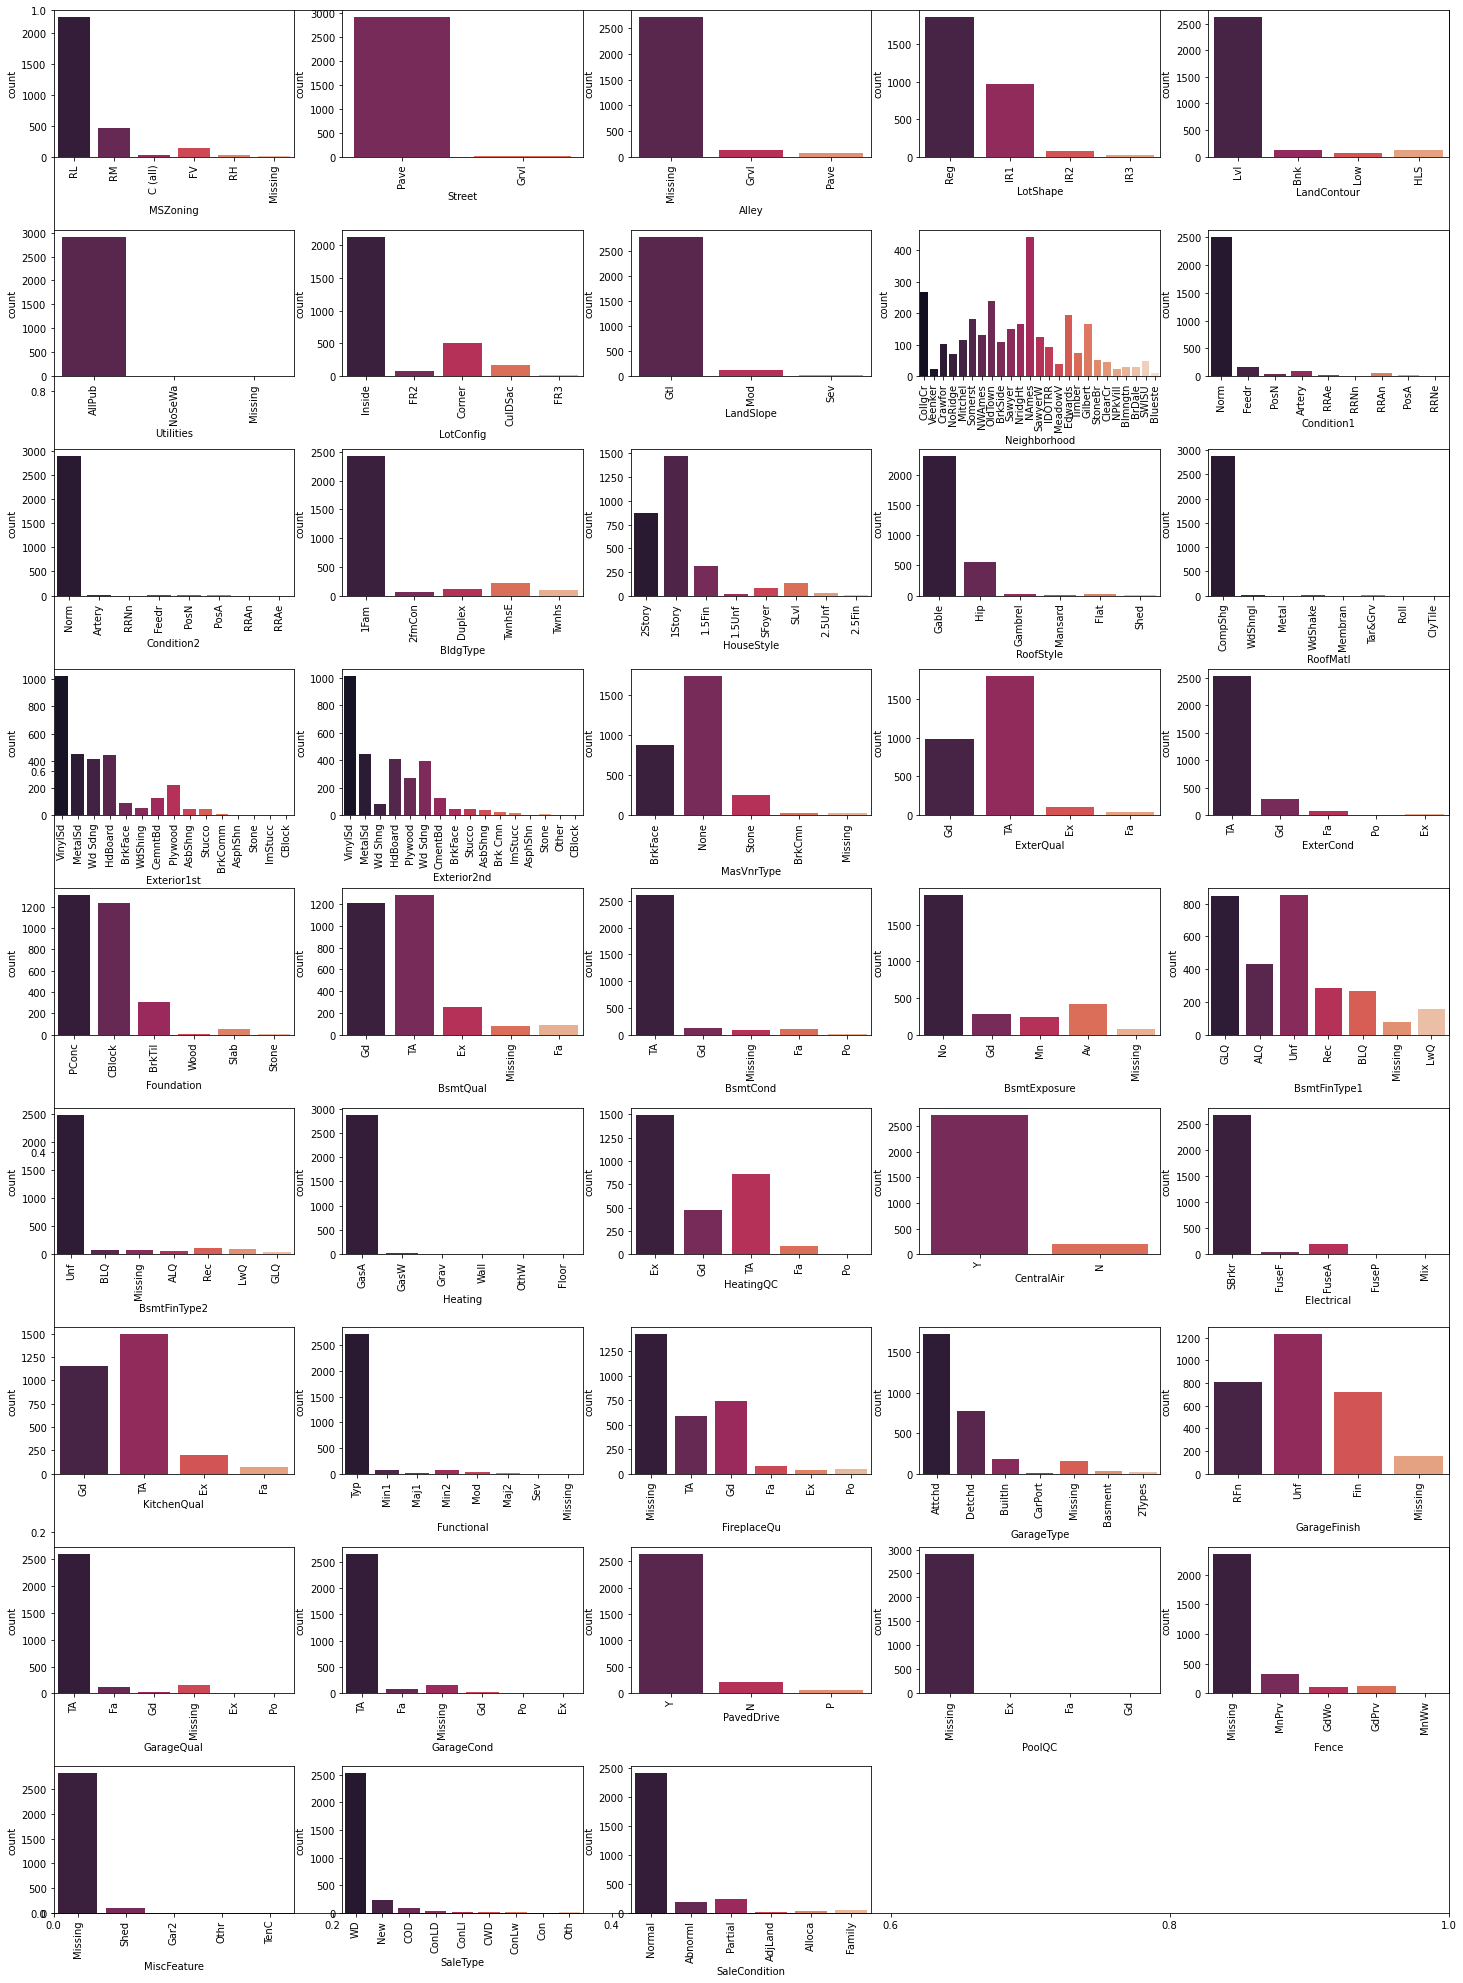

In [17]:
# Plot categorial feature variables 
cat_data = df[cat_columns]
cat_data_cols = cat_data.columns
cat_data_cols_length = (len(cat_data_cols)/5)+1

fg, ax = plt.subplots(figsize=(25, 35))
fg.subplots_adjust(hspace=0.5)
for i, col in enumerate(cat_data):
    fg.add_subplot(cat_data_cols_length, 5, i+1)
    sns.countplot(cat_data[col], palette='rocket')
    plt.xlabel(col)
    plt.xticks(rotation=90)

plt.show()

##Feature Engineering

---


In [18]:
# Review all column index
#Check all the data column index we can clear to see each column name
df.columns.values

array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'Pav

In [19]:
# Correlation table,feature and feature correlation
corMat = df.corr(method='pearson')
corMat

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.008931,-0.025235,-0.040746,-0.029771,-0.002839,-0.016581,-0.050438,-0.025126,-0.016945,0.018249,-0.014451,-0.024922,-0.008678,-0.022252,-0.037816,-0.029046,0.000145,0.010385,-0.009946,-0.015358,0.003074,-0.011702,-0.029368,-0.035236,-0.025863,-0.010205,-0.008862,-0.007056,0.009960,0.021609,-0.046538,0.022208,0.014332,0.008244,0.006448,-0.256050,-0.007753
MSSubClass,0.008931,1.000000,-0.390118,-0.201730,0.033638,-0.065625,0.034409,0.043315,0.005422,-0.064302,-0.072520,-0.125978,-0.219936,-0.248641,0.309309,0.026482,0.071677,0.009947,-0.001878,0.139140,0.178750,-0.008796,0.260155,0.040509,-0.055151,0.082790,-0.046596,-0.103392,-0.017654,-0.015923,-0.020867,-0.037529,-0.049181,-0.003080,-0.028867,-0.001231,-0.015028,-0.059294
LotFrontage,-0.025235,-0.390118,1.000000,0.364382,0.204190,-0.068350,0.116905,0.085608,0.202210,0.203603,0.041396,0.104971,0.331031,0.424147,0.023842,0.004669,0.349484,0.102940,-0.023020,0.164469,0.035572,0.212943,0.004359,0.320863,0.234612,0.070391,0.292086,0.338979,0.106380,0.152160,0.010541,0.025255,0.069348,0.160857,0.035762,0.010337,-0.007265,0.244680
LotArea,-0.040746,-0.201730,0.364382,1.000000,0.100541,-0.035617,0.024128,0.021612,0.125354,0.194021,0.084055,0.021361,0.254125,0.332460,0.031515,0.000554,0.284519,0.127862,0.026192,0.125826,0.034244,0.132801,-0.020854,0.213802,0.261185,-0.008564,0.180433,0.213251,0.158045,0.104797,0.020974,0.015995,0.054375,0.093708,0.069029,0.004156,-0.024234,0.236105
OverallQual,-0.029771,0.033638,0.204190,0.100541,1.000000,-0.093847,0.597554,0.571532,0.430961,0.281704,-0.042755,0.275072,0.549087,0.479152,0.245596,-0.048393,0.575126,0.164465,-0.040713,0.528483,0.272668,0.073075,-0.159325,0.389761,0.390753,0.544247,0.600682,0.565065,0.255317,0.298084,-0.139256,0.018715,0.042910,0.030740,0.005562,0.030405,-0.019614,0.548617
OverallCond,-0.002839,-0.065625,-0.068350,-0.035617,-0.093847,1.000000,-0.368477,0.047654,-0.135752,-0.050403,0.041489,-0.138162,-0.173952,-0.157418,0.005494,0.009048,-0.116569,-0.042109,0.084133,-0.215504,-0.088577,-0.008477,-0.086700,-0.092027,-0.030999,-0.304784,-0.181783,-0.154145,0.020123,-0.068978,0.071044,0.043739,0.043713,-0.016876,0.033956,-0.006256,0.030102,-0.055036
YearBuilt,-0.016581,0.034409,0.116905,0.024128,0.597554,-0.368477,1.000000,0.612235,0.312579,0.279547,-0.027591,0.130457,0.408466,0.310814,0.017588,-0.144191,0.242666,0.211549,-0.030278,0.471169,0.269743,-0.053101,-0.137614,0.114280,0.170680,0.790032,0.537839,0.480525,0.229426,0.198554,-0.374073,0.015958,-0.041046,0.002304,-0.010886,0.013938,-0.012344,0.368664
YearRemodAdd,-0.050438,0.043315,0.085608,0.021612,0.571532,0.047654,0.612235,1.000000,0.196117,0.152056,-0.062125,0.165099,0.297969,0.242245,0.158985,-0.060371,0.316972,0.134878,-0.046261,0.457980,0.211430,-0.021912,-0.142431,0.198250,0.134157,0.627270,0.425985,0.376733,0.218513,0.242182,-0.220456,0.037433,-0.046878,-0.011407,-0.003124,0.017693,0.033203,0.354302
MasVnrArea,-0.025126,0.005422,0.202210,0.125354,0.430961,-0.135752,0.312579,0.196117,1.000000,0.301999,-0.015633,0.089712,0.395632,0.393761,0.120454,-0.057910,0.402032,0.141078,0.015001,0.258288,0.190753,0.077887,-0.051206,0.277535,0.274166,0.247714,0.360079,0.372865,0.165839,0.143659,-0.111156,0.013611,0.065188,0.004512,0.044810,-0.000117,-0.018457,0.339679
BsmtFinSF1,-0.016945,-0.064302,0.203603,0.194021,0.281704,-0.050403,0.279547,0.152056,0.301999,1.000000,-0.055045,-0.477404,0.536467,0.458056,-0.162284,-0.066028,0.211617,0.638744,0.078349,0.081510,-0.007311,-0.113526,-0.086354,0.052119,0.293046,0.189912,0.255436,0.310403,0.223471,0.124153,-0.099710,

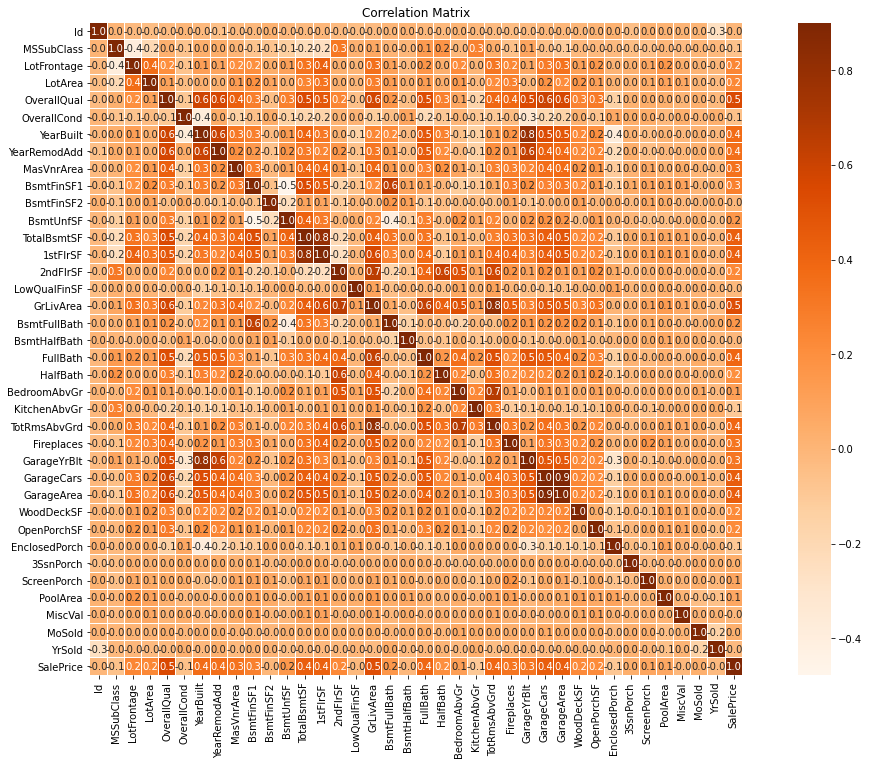

In [20]:
# Heat map_positive and negative correlation
plt.subplots(figsize=(20,12))
corrmat = df.corr()
plt.title("Correlation Matrix")
sns.heatmap(corrmat, vmax=0.9, square=True, cmap="Oranges", annot=True, fmt='.1f', linewidth='.1')


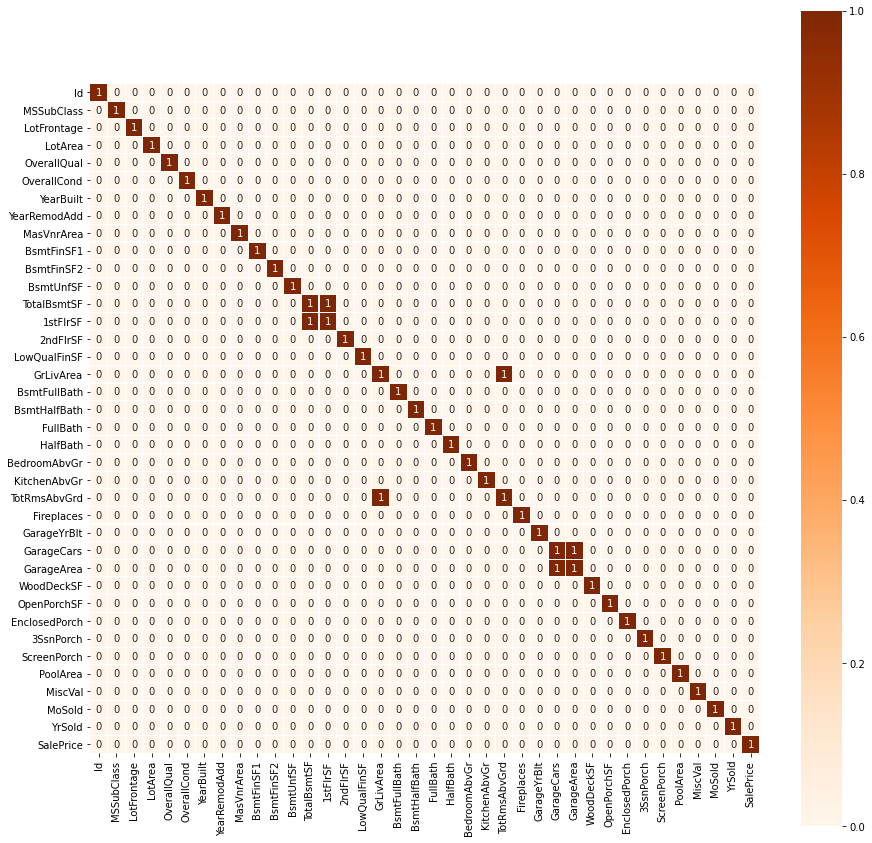

In [21]:
plt.subplots(figsize=(15, 15))
sns.heatmap(corrmat>0.8, annot=True, square=True, cmap="Oranges", linewidth='.1')

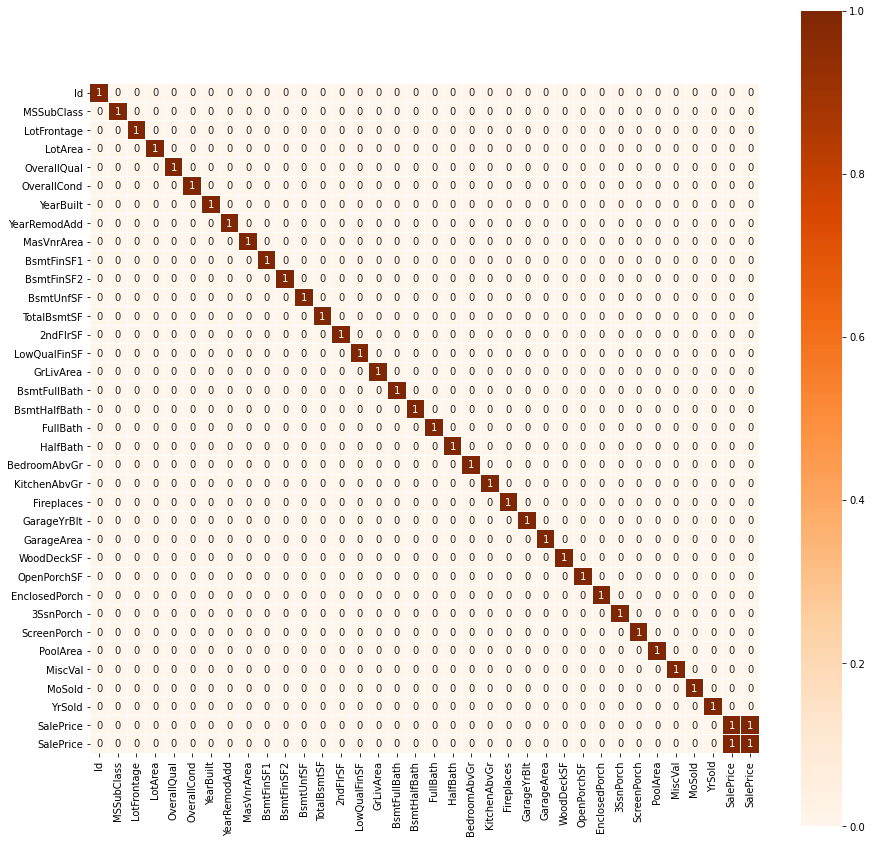

In [22]:
# Drop correlated columns and plot the result

df = df.drop(['1stFlrSF', 'GarageCars', 'TotRmsAbvGrd'], axis=1)

df_train = pd.concat([df[:num_train], y_train], axis=1)
corrmat = df_train.corr()
plt.subplots(figsize=(15, 15))
sns.heatmap(corrmat>0.8, annot=True, square=True, cmap="Oranges", linewidth='.1')

In [23]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedP

In [24]:
#SalePrice:the property's sale price in dollars. 
#we may need drop all of them 

# = df.drop(['Id'],'SalePrice','MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1',
#                  'Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation',
#                  'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual',
#                  'Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType',
 #                 'SaleCondition'],axis=1)
#df_new.columns.values

In [25]:
#one hot encode
df = pd.get_dummies(df)

**Split data**

---

In [26]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt

In [27]:
df.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=305)

In [28]:
from sklearn.model_selection import train_test_split
#feature Salesprice is our predict feature, so we need drop it 
X= df.drop(['SalePrice'], axis=1)
#lable
y =df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

# need check xtain and ytrain shape

In [29]:
X_train.shape

(2043, 304)

In [30]:
y_train.shape

(2043,)

In [31]:
X_test.shape

(876, 304)

In [32]:
y_test.shape

(876,)

##KNN_Regression##


---

In [33]:
# Checnk K from 1 to 20
rmse_val = []
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train, y_train) 
    y_pred=model.predict(X_test)
    error = sqrt(mean_squared_error(y_test,y_pred))
    rmse_val.append(error)
    #RootMeanSquareError get avarage error
    print('RMSE value for k= ' , K , 'is:', error)
    
#When k = which number we can get best modle
print('\nWhen k=',rmse_val.index(min(rmse_val))+1, 'we can get minmum RMSE:', min(rmse_val)) 

RMSE value for k=  1 is: 44449.24829951062
RMSE value for k=  2 is: 40226.26143744301
RMSE value for k=  3 is: 38565.702625610094
RMSE value for k=  4 is: 37717.615499975145
RMSE value for k=  5 is: 37476.81661081249
RMSE value for k=  6 is: 37412.181250888774
RMSE value for k=  7 is: 37160.36690776301
RMSE value for k=  8 is: 37249.77668388794
RMSE value for k=  9 is: 37783.86236714248
RMSE value for k=  10 is: 38072.998487833705
RMSE value for k=  11 is: 38058.49217247453
RMSE value for k=  12 is: 38196.5208159856
RMSE value for k=  13 is: 38017.62666929028
RMSE value for k=  14 is: 38261.375747686434
RMSE value for k=  15 is: 38318.462104900296
RMSE value for k=  16 is: 38260.29913466692
RMSE value for k=  17 is: 38484.61396074796
RMSE value for k=  18 is: 38643.52428495776
RMSE value for k=  19 is: 38941.56279850279
RMSE value for k=  20 is: 39214.75207132208

When k= 7 we can get minmum RMSE: 37160.36690776301


##Linear Regression##

In [34]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.figure
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

#feature
X= df.drop(['SalePrice'], axis=1)
#lable
y =df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)


regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
#predict price
#y=ax+b, intercept is b,slope is a
model = LinearRegression().fit(X_train, y_train)
y_pred = regressor.predict(X_test)
errorS = sqrt(mean_squared_error(y_test,y_pred))

print('RMSE:',errorS)
print('R^2:', model.score(X_test, y_test))

#To retrieve the intercept:
print('Intercept:', model.intercept_)

#For retrieving the slope  :

print('Coefficient:',model.coef_)

RMSE: 45650.35908066793
R^2: 0.34371627097753576
Intercept: -2535141.9416035316
Coefficient: [ 1.30226424e+00 -1.04445101e+02 -3.40042503e+01  7.37889189e-01
  2.41235493e+03  4.59150863e+03  3.64988809e+02  2.72931178e+01
 -6.19684013e+00  7.27201267e+00  4.90212739e+00  3.85909223e+00
  1.60332274e+01  1.85886593e+01 -2.26783431e+01  2.95355179e+01
 -3.07449389e+03  3.12182737e+03  6.45513613e+03  3.30759259e+02
 -4.62686741e+03 -2.85210305e+04  2.86620676e+03 -5.95188317e+01
 -1.27878611e+00 -8.01731145e+00  6.46549082e+00 -1.32064784e+01
  5.73934043e+01  2.91554501e+01  1.53417631e+02 -1.26042393e+01
  4.21552580e+02  9.44418441e+02  7.22495535e+03 -1.60254945e+03
  3.22663960e+04 -1.76788407e+04 -6.04161503e+03 -1.41683462e+04
 -3.67693173e+03  3.67693173e+03  3.24380463e+03  2.78613374e+03
 -6.02993837e+03 -3.05351533e+03 -6.02576102e+02  1.68980067e+02
  3.48711136e+03 -3.46651839e+03 -9.13302782e+03  6.50016486e+03
  6.09938135e+03  1.07027855e+04  3.29611990e+04 -4.36639845e+

R^2：According to the value of R-Squared, to judge the quality of the model, the value range is [0,1]: if R^2 = 0 will under fitting, if R^2 = 1 will over fitting.
The larger R-Squared, the better the model fitting effect. As the number of samples increases, R-Square will inevitably increase. It is impossible to truly quantify the degree of accuracy, but only roughly quantify.


In [36]:
regressor.predict(X_train)

array([156222.06012406, 160148.68459021, 185927.36831716, ...,
       145195.78666886, 130139.81545522, 150516.67342369])

In [37]:
X_test.columns


Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=304)

In [38]:
X_test_plot= X_test['YearBuilt']

In [39]:
mpl.matplotlib_fname()

'/usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/matplotlibrc'

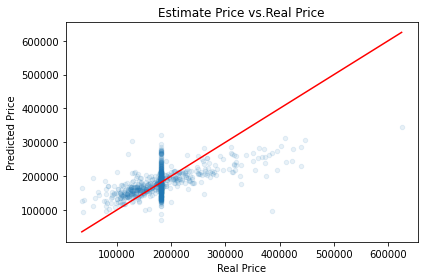

In [40]:
# Visualising the Test set results
plt.figure(figsize=(6,4))
plt.scatter(y_test,y_pred, s = 20, alpha = 0.1)
plt.title('Estimate Price vs.Real Price')
plt.xlabel('Real Price')
plt.ylabel('Predicted Price')

plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],'r')
#plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.tight_layout()
#plt.show()


In [41]:
regressor.score(X_test,y_test)

0.34371627097753576

##Random Forest

In [42]:
#from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

rfr = RandomForestRegressor(n_estimators=10)
rfr.fit(X_train, y_train)
rfr.score(X_test, y_test)

0.8651989267275038

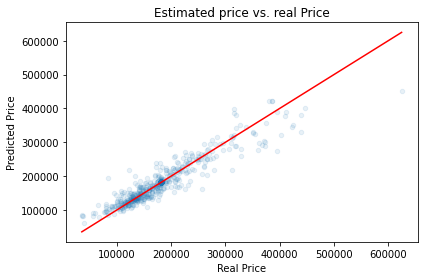

In [43]:
y_pred = rfr.predict(X_test)

plt.figure(figsize=(6,4))
plt.scatter(y_test,y_pred,s=20,alpha=0.1)
plt.title('Estimated price vs. real Price')
plt.xlabel('Real Price')
plt.ylabel('Predicted Price')

plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],'r')
plt.tight_layout()

XGBoost

---

In [44]:
import pandas as pd
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import GPy
import GPyOpt
from xgboost import XGBRegressor
from GPyOpt.methods import BayesianOptimization
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [45]:
xgb = XGBRegressor()
baseline = cross_val_score(xgb, X_train, y_train, scoring='neg_mean_squared_error').mean()

search_space = [{'name': 'learning_rate', 'type': 'continuous', 'domain': (0, 1)},
                {'name': 'gamma', 'type': 'continuous', 'domain': (0, 5)},
                {'name': 'max_depth', 'type': 'discrete', 'domain': (3, 5, 7, 10, 15, 20)},
                {'name': 'n_estimators', 'type': 'discrete', 'domain': (3000, 5000, 7000)},
                {'name': 'min_child_weight', 'type': 'discrete', 'domain': (0, 100)}]

def cv_score(parameters):
    parameters = parameters[0]
    score = cross_val_score(
                XGBRegressor(learning_rate=parameters[0],
                              gamma=int(parameters[1]),
                              max_depth=int(parameters[2]),
                              n_estimators=int(parameters[3]),
                              min_child_weight = parameters[4]), 
                X_train, y_train, scoring='neg_mean_squared_error').mean()
    score = np.array(score)
    return score

optimizer = BayesianOptimization(f=cv_score, 
                                 domain=search_space,
                                 model_type='GP',
                                 acquisition_type ='EI',
                                 acquisition_jitter = 0.05,
                                 exact_feval=True, 
                                 maximize=True,
                                 verbosity=True,
                                 verbosity_model=True)

optimizer.run_optimization(max_iter=3, verbosity=True)

[18:18:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:18:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:18:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:18:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:18:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:18:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:21:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:23:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

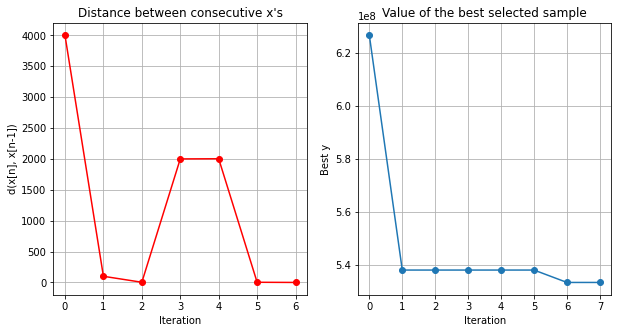

In [46]:
# Plot the convergence as a function of iterations
optimizer.plot_convergence()

Baseline neg. MSE = -531724972.561
Bayesian optimization neg. MSE = -533527247.736


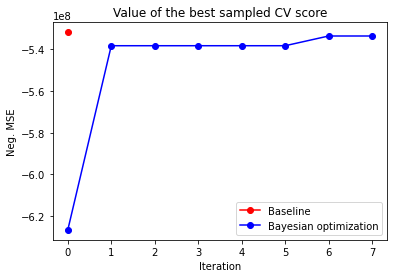

In [47]:
# Plot the accumulated score of the optimizer for Y compared to baseline
y_bo = np.maximum.accumulate(-optimizer.Y).ravel()

print(f'Baseline neg. MSE = {baseline:.3f}')
print(f'Bayesian optimization neg. MSE = {y_bo[-1]:.3f}')

plt.plot(baseline, 'ro-', label='Baseline')
plt.plot(y_bo, 'bo-', label='Bayesian optimization')
plt.xlabel('Iteration')
plt.ylabel('Neg. MSE')
plt.title('Value of the best sampled CV score')
plt.legend()

In [48]:
# Put our results in a dataframe and show them
header_params = []
for param in search_space:
    header_params.append(param['name'])

df_results = pd.DataFrame(data=optimizer.X, columns=header_params)
df_results['error'] = optimizer.Y
df_results = df_results.sort_values(by=['error'])
df_results

,learning_rate,gamma,max_depth,n_estimators,min_child_weight,error
6,0.018714,1.831001,7.0,3000.0,0.0,5.335272e+08
1,0.033725,1.922834,7.0,3000.0,0.0,5.381987e+08
0,0.394957,4.841671,5.0,7000.0,0.0,6.266830e+08
3,0.400486,4.049700,5.0,3000.0,100.0,7.243872e+08
2,0.695847,1.522906,7.0,3000.0,100.0,8.196621e+08
4,0.955920,0.224335,10.0,5000.0,100.0,9.036546e+08
5,0.772297,2.114273,10.0,3000.0,0.0,1.002758e+09
7,0.000000,1.557635,7.0,3000.0,0.0,3.586478e+10


In [49]:
# Train a model with val set using best found parameters
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=0)
xgb = XGBRegressor(n_estimators=6000,
                   min_child_weight=10,
                   max_depth=1,
                   gamma=0.06,
                   learning_rate=0.01,
                   random_state=0)
xgb.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="rmse",
       eval_set=[(X_train, y_train), (X_val, y_val)], verbose=False)
predictions = xgb.predict(X_test)

[19:21:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


**Here's a brief version of what you'll find in the data description file.**

SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.

MSSubClass: The building class

MSZoning: The general zoning classification

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access

Alley: Type of alley access

LotShape: General shape of property

LandContour: Flatness of the property

Utilities: Type of utilities available

LotConfig: Lot configuration

LandSlope: Slope of property

Neighborhood: Physical locations within Ames city limits

Condition1: Proximity to main road or railroad

Condition2: Proximity to main road or railroad (if a second is present)

BldgType: Type of dwelling

HouseStyle: Style of dwelling

OverallQual: Overall material and finish quality

OverallCond: Overall condition rating

YearBuilt: Original construction date

YearRemodAdd: Remodel date

RoofStyle: Type of roof

RoofMatl: Roof material

Exterior1st: Exterior covering on house

Exterior2nd: Exterior covering on house (if more than one material)

MasVnrType: Masonry veneer type

MasVnrArea: Masonry veneer area in square feet

ExterQual: Exterior material quality

ExterCond: Present condition of the material on the exterior

Foundation: Type of foundation

BsmtQual: Height of the basement

BsmtCond: General condition of the basement

BsmtExposure: Walkout or garden level basement walls

BsmtFinType1: Quality of basement finished area

BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Quality of second finished area (if present)

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating

HeatingQC: Heating quality and condition

CentralAir: Central air conditioning

Electrical: Electrical system

1stFlrSF: First Floor square feet

2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Number of bedrooms above basement level

Kitchen: Number of kitchens

KitchenQual: Kitchen quality

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality rating

Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

GarageType: Garage location

GarageYrBlt: Year garage was built

GarageFinish: Interior finish of the garage

GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

GarageCond: Garage condition

PavedDrive: Paved driveway

WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality

Fence: Fence quality

MiscFeature: Miscellaneous feature not covered in other categories

MiscVal: $Value of miscellaneous feature

MoSold: Month Sold

YrSold: Year Sold

SaleType: Type of sale

SaleCondition: Condition of sale